## Live stats 7 Hypothesis testing for an associaton

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
heart = pd.read_csv('https://raw.githubusercontent.com/Codecademy/Master-Statistics-Live-Series/main/Codecademy%20Live%20Stats%20%237/heart_disease.csv')
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    float64
 1   sex            303 non-null    object 
 2   trestbps       303 non-null    float64
 3   chol           303 non-null    float64
 4   cp             303 non-null    object 
 5   exang          303 non-null    float64
 6   fbs            303 non-null    float64
 7   thalach        303 non-null    float64
 8   heart_disease  303 non-null    object 
dtypes: float64(6), object(3)
memory usage: 21.4+ KB


In [5]:
#trestbps = blood pressure, chol = cholesterol, thalach = heart rate achieved in test 

heart.groupby('heart_disease').mean()

,age,trestbps,chol,exang,fbs,thalach
heart_disease,,,,,,
absence,52.585366,129.250000,242.640244,0.140244,0.140244,158.378049
presence,56.625899,134.568345,251.474820,0.546763,0.158273,139.258993


In [6]:
heart.groupby('heart_disease').median()

,age,trestbps,chol,exang,fbs,thalach
heart_disease,,,,,,
absence,52.0,130.0,234.5,0.0,0.0,161.0
presence,58.0,130.0,249.0,1.0,0.0,142.0


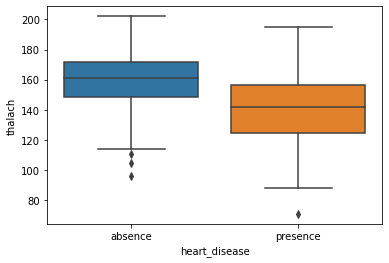

In [7]:
sns.boxplot(x=heart.heart_disease, y=heart.thalach)
plt.show()

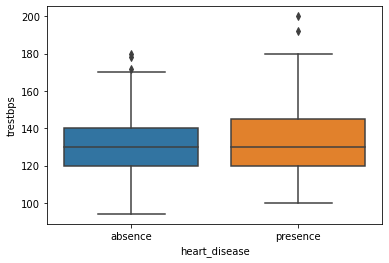

In [8]:
sns.boxplot(x=heart.heart_disease, y=heart.trestbps)
plt.show()

In [9]:
# is the difference in means significant?

### Two samples t-test

In [10]:
#simulate samples with null distribution
#h0= true mean resting bp 
#of people with heard disease - true  mean of ppl wihtout hd = 0

In [12]:
heart[['trestbps', 'heart_disease']].head()

,trestbps,heart_disease
0,145.0,absence
1,160.0,presence
2,120.0,presence
3,130.0,absence
4,130.0,absence


In [17]:
# permute the hd column

scramble = np.random.choice(heart.heart_disease, size = len(heart), replace=False)
sim_trestbps_hd = heart.trestbps[scramble == 'presence']
sim_trestbps_no_hd = heart.trestbps[scramble == 'absence']
sim_mean_diff = np.mean(sim_trestbps_hd) - np.mean(sim_trestbps_no_hd)
print(sim_mean_diff)

4.387918933146153


In [18]:
null_mean_diff = []

for i in range(1000):
    scramble = np.random.choice(heart.heart_disease, size = len(heart), replace=False)
    sim_trestbps_hd = heart.trestbps[scramble == 'presence']
    sim_trestbps_no_hd = heart.trestbps[scramble == 'absence']
    sim_mean_diff = np.mean(sim_trestbps_hd) - np.mean(sim_trestbps_no_hd)
    null_mean_diff.append(sim_mean_diff)

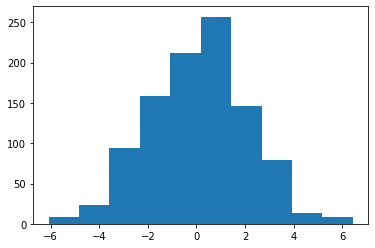

In [19]:
plt.hist(null_mean_diff)
plt.show()

In [20]:
# true observed mean diff
trestbps_hd = heart.trestbps[heart.heart_disease == 'presence']
trestbps_nohd = heart.trestbps[heart.heart_disease == 'absence']
observed_mean_diff = np.mean(trestbps_hd) - np.mean(trestbps_nohd)
print(observed_mean_diff)

5.318345323740999


<function matplotlib.pyplot.show(*args, **kw)>

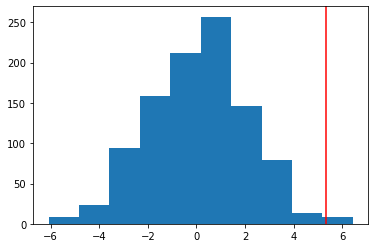

In [21]:
plt.hist(null_mean_diff)
plt.axvline(x = observed_mean_diff, color = 'red')
plt.show

In [33]:
#p-value (one-sided)
np.sum(np.array(null_mean_diff) > observed_mean_diff)/len(null_mean_diff)

0.008

In [32]:
#p-value (2-sided)
np.sum(np.array(null_mean_diff) > observed_mean_diff)/len(null_mean_diff)*2

0.016

In [25]:
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(trestbps_hd,trestbps_nohd)
print(pval)

0.008548268928594928


In [26]:
thalach_typical = heart.thalach[heart.cp == 'typical angina']
thalach_asymptom = heart.thalach[heart.cp == 'asymptomatic']
thalach_nonangin = heart.thalach[heart.cp == 'non-anginal pain']
thalach_atypical = heart.thalach[heart.cp == 'atypical angina']

In [27]:
# ANOVA

In [28]:
from scipy.stats import f_oneway
Fstat, pval = f_oneway(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical)
print('p-value for ANOVA: ', pval)

p-value for ANOVA:  1.9065505247705008e-10


In [29]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
output = pairwise_tukeyhsd(heart.thalach, heart.cp)
print(output)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394  0.001  12.7439  30.735   True
    asymptomatic non-anginal pain  14.7264  0.001    7.258 22.1948   True
    asymptomatic   typical angina   15.276 0.0081   2.9702 27.5817   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7591   2.733  False
 atypical angina   typical angina  -6.4635 0.6069 -20.2707  7.3438  False
non-anginal pain   typical angina   0.5495    0.9  -12.315 13.4141  False
-------------------------------------------------------------------------


In [30]:
# chi-square test
Xtab = pd.crosstab(heart.cp, heart.heart_disease)
print(Xtab)

heart_disease     absence  presence
cp                                 
asymptomatic           39       105
atypical angina        41         9
non-anginal pain       68        18
typical angina         16         7


In [31]:
from scipy.stats import chi2_contingency
chi2, pval, dof, exp = chi2_contingency(Xtab)
print('p-value for chi-square test: ', pval)

p-value for chi-square test:  1.2517106007837527e-17
